# Saurabh Kumar | ESET0128  |   Advance Python AIML DAY:18

## Clustering on cleaned customer1_data (new_customr_data)

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
d=pd.read_csv('new_customr_data.csv')

In [38]:
d

,customer_id,age,income,purchase_amount,gender,region,total_purchases,preferred_product_category,customer_loyalty_score,signup_date,last_purchase_date
0,2,69.0,50200.0,252.214693,Male,North,27.0,Toys,14.402036,2022-03-14,2022-07-03
1,5,60.0,112300.0,1528.118235,Female,West,6.0,Clothing,28.893785,2021-04-21,2021-06-02
2,6,25.0,62000.0,1024.023200,Male,West,5.0,Home & Garden,14.360273,2021-11-18,2023-07-06
3,7,78.0,90500.0,1283.045712,Female,East,27.0,Home & Garden,48.221228,2022-06-11,2023-02-01
4,8,38.0,81000.0,1970.645619,Male,East,8.0,Clothing,70.952806,2021-06-26,2022-12-21
...,...,...,...,...,...,...,...,...,...,...,...
2215,3467,39.0,43200.0,1022.574095,Female,North,34.0,Toys,13.352897,2022-03-21,2022-09-04
2216,3468,25.0,23800.0,1943.602386,Male,West,4.0,Health,23.179639,2022-03-29,2022-12-23
2217,3471,34.0,80400.0,465.975007,Male,South,3.0,Electronics,13.268861,2021-03-07,2023-07-29
2218,3472,77.0,64400.0,1369.291029,Female,South,35.0,Home & Garden,73.795857,2022-02-09,2023-09-05


In [39]:
d=d.select_dtypes(exclude='object')

In [40]:
d=d.drop(['customer_id'],axis=1)

In [41]:
d

,age,income,purchase_amount,total_purchases,customer_loyalty_score
0,69.0,50200.0,252.214693,27.0,14.402036
1,60.0,112300.0,1528.118235,6.0,28.893785
2,25.0,62000.0,1024.023200,5.0,14.360273
3,78.0,90500.0,1283.045712,27.0,48.221228
4,38.0,81000.0,1970.645619,8.0,70.952806
...,...,...,...,...,...
2215,39.0,43200.0,1022.574095,34.0,13.352897
2216,25.0,23800.0,1943.602386,4.0,23.179639
2217,34.0,80400.0,465.975007,3.0,13.268861
2218,77.0,64400.0,1369.291029,35.0,73.795857


In [42]:
from sklearn.cluster import KMeans

wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(d)
  wcss.append(kmeans.inertia_)

In [43]:
wcss

[1865500831342.9714,
 450255604919.9765,
 201252070056.6458,
 115058790660.20811,
 72481833347.11984,
 51587926928.87117,
 37206243014.132355,
 29176381307.594093,
 23795565242.675583,
 18153299027.461933]

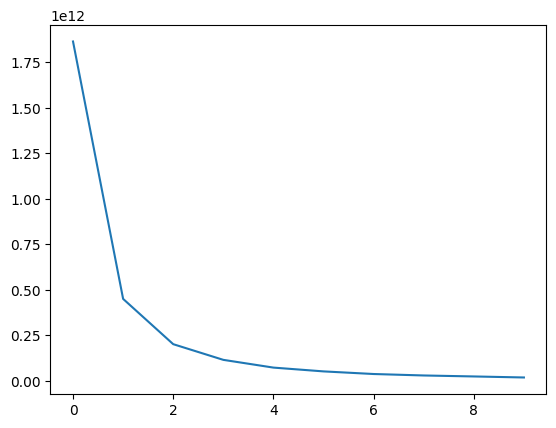

In [44]:
plt.plot(wcss)

In [45]:
from sklearn.metrics import silhouette_score

silhout_coeff=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(d)
  score=silhouette_score(d,kmeans.labels_)
  silhout_coeff.append(score)

In [46]:
silhout_coeff

[np.float64(0.6342231669889156),
 np.float64(0.5926890317323675),
 np.float64(0.5689884152594233),
 np.float64(0.5606261943994886),
 np.float64(0.5468452323742626),
 np.float64(0.5475131586539904),
 np.float64(0.5360205584354155),
 np.float64(0.5395994085144811),
 np.float64(0.536925935919524)]

Text(0.5, 1.0, 'Silhouette Coefficient Analysis')

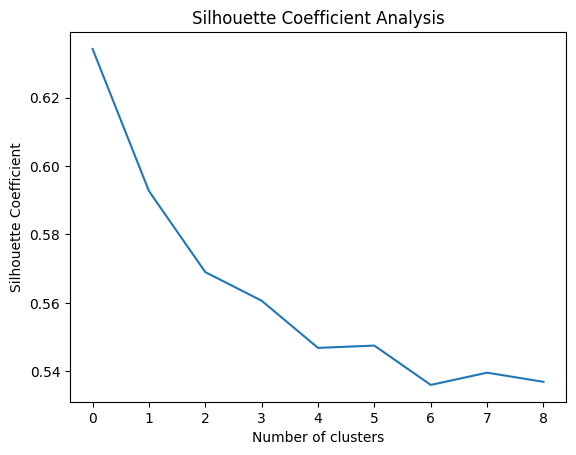

In [47]:
plt.plot(silhout_coeff)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Analysis')

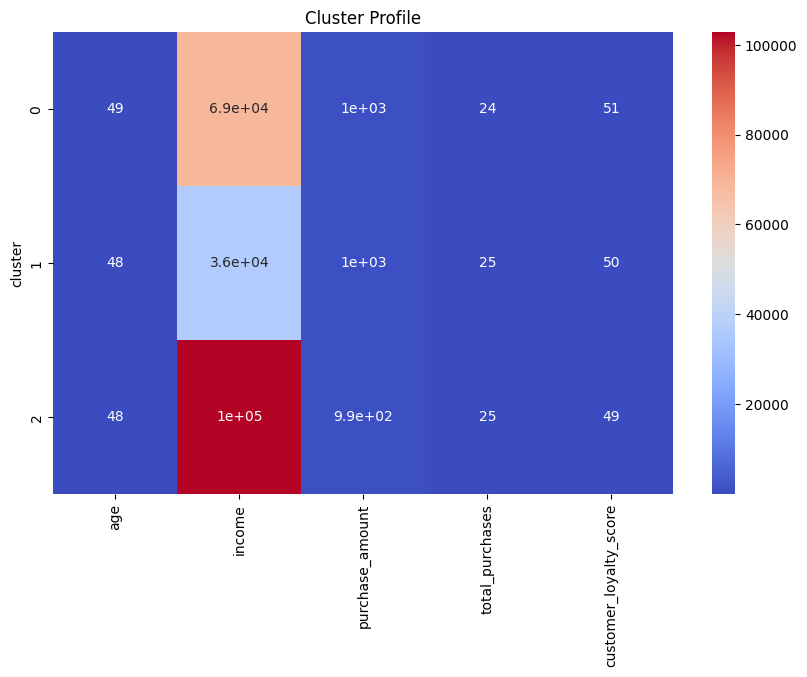

In [55]:

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(d)

# Add the cluster labels to the DataFrame
d['cluster'] = kmeans.labels_

# Now group by 'cluster' and calculate the mean
cluster_profile = d.groupby('cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm')
plt.title('Cluster Profile')
plt.show()

## Maximum income person is present in cluster 2